# GPU Pricing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from jupyterthemes import jtplot
jtplot.style(grid = False, ticks = True, figsize = (15,20))

### Clean-up

In [2]:
data = pd.read_csv('C:/Users/cwnos/Documents/DSC680/Project 2/gpu_specs_prices.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,"$1,289.99",https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,"$1,199.99",https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,"$1,794.99",https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,"$2,017.21",https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,"$3,399.99",https://pcbuilder.net/component-details/graphi...,0


In [5]:
df.dtypes

name                object
brand               object
model               object
memory              object
memory_interface    object
length              object
interface           object
chipset             object
base_clock          object
clock_speed         object
frame_sync          object
price               object
item_url            object
used                 int64
dtype: object

In [6]:
print('Unique Values')
print('Name: ',df['name'].nunique())
print('Brand: ',df['brand'].nunique())
print('Model:', df['model'].nunique())
print('Memory: ', df['memory'].nunique())
print('Memory Type: ',df['memory_interface'].nunique())
print('Card Length: ', df['length'].nunique())
print('Slot Type: ', df['interface'].nunique())
print('Chipset: ', df['chipset'].nunique())
print('Base Clock: ', df['base_clock'].nunique())
print('Clock Speed: ', df['clock_speed'].nunique())
print('Frame Sync: ', df['frame_sync'].nunique())
print('Price: ', df['price'].nunique())
print('URL: ', df['item_url'].nunique())
print('New/Used: ', df['used'].nunique())

Unique Values
Name:  306
Brand:  22
Model: 250
Memory:  17
Memory Type:  8
Card Length:  139
Slot Type:  10
Chipset:  62
Base Clock:  73
Clock Speed:  98
Frame Sync:  4
Price:  231
URL:  311
New/Used:  2


In [7]:
slot = df['memory'].unique()
slot

array([' 24 GB ', ' 12 GB ', ' 16 GB ', ' 10 GB ', ' 11 GB ', ' 8 GB ',
       ' 48 GB ', ' 6 GB ', ' 6Â\xa0GB ', ' 4 GB ', ' 8Â\xa0GB ',
       ' 3 GB ', ' 4Â\xa0GB ', ' 2 GB ', ' 1Â\xa0GB ', ' 1 GB ',
       ' 0.5 GB '], dtype=object)

In [8]:
df = df.dropna(axis = 0)
# price
df['price'] = df['price'].str.replace("$","")
df['price'] = df['price'].str.replace(",","")
df['price'] = df['price'].str.replace(" ","")
df['price'] = df['price'].str.replace("N/A","")

# Base Clock
df['base_clock'] = df['base_clock'].str.replace(" MHz ","")
df['base_clock'] = df['base_clock'].str.replace(" N/A ","")
df['base_clock'] = df['base_clock'].str.replace("1440MHz","1440")
# Clock
df['clock_speed'] = df['clock_speed'].str.replace(" MHz ","")
df['clock_speed'] = df['clock_speed'].str.replace(" N/A ","")
df['clock_speed'] = df['clock_speed'].str.replace("2190MHz","2190") 

# Length
df['length'] = df['length'].str.replace(" mm ","")
df['length'] = df['length'].str.replace(" W ","")
df['length'] = df['length'].str.replace(" N/A ", "")
df['length'] = df['length'].str.replace(" ", "")

# Memory type
df = df.replace(to_replace=r' GDRR6X ', value= ' GDDR6X ', regex=True)

# Memory amount
df = df.replace(to_replace=r' 4Â\xa0GB ', value= ' 4 GB ', regex=True)
df = df.replace(to_replace=r' 6Â\xa0GB ', value= ' 6 GB ', regex=True)
df = df.replace(to_replace=r' 8Â\xa0GB ', value= ' 8 GB ', regex=True)
df = df.replace(to_replace=r' 1Â\xa0GB ', value= ' 1 GB ', regex=True)

df['memory'] = df['memory'].str.replace(" GB ","")

C:\Users\cwnos\AppData\Local\Temp/ipykernel_38388/3595984126.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [9]:
df = df.replace(to_replace=[r' PCI Express 4.0 x16 ', r' PCIe 4.0x16 ',r' PCI-Express 4.0 x16 '
                           ,r' PCI-Express 4.0 x16 ', r' PCIe 4.0 x16 ', r' PCI Express 3.0 x16 '
                           ,r' PCI ExpressÂ\xa03.0Â\xa0 ', r' PCI ExpressÂ\xa03.0Â\xa0x16 '
                           , r' PCI ExpressÂ\xa02.0Â\xa0x16 ', r' PCIe x1 '], value= ' PCIe x16 ', regex=True)


In [10]:
df['memory'] = pd.to_numeric(df['memory'])
df['length'] = pd.to_numeric(df['length'])
df['base_clock'] = pd.to_numeric(df['base_clock'])
df['clock_speed'] = pd.to_numeric(df['clock_speed'])
df['price'] = pd.to_numeric(df['price'])  
df.dtypes

name                 object
brand                object
model                object
memory              float64
memory_interface     object
length              float64
interface            object
chipset              object
base_clock            int64
clock_speed           int64
frame_sync           object
price               float64
item_url             object
used                  int64
dtype: object

In [11]:
df.head()

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDDR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24.0,GDDR6X,335.0,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24.0,GDDR6X,300.0,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24.0,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDDR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24.0,GDDR6X,336.0,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24.0,GDDR6X,319.0,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,https://pcbuilder.net/component-details/graphi...,0


In [12]:
df = df.drop(columns = ['item_url','used','frame_sync'])

In [13]:
df.head()

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,price
0,MSI Gaming GeForce RTX 3090 24GB GDDR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24.0,GDDR6X,335.0,PCIe x16,GeForce RTX 3090,1395,1785,1289.99
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24.0,GDDR6X,300.0,PCIe x16,GeForce RTX 3090,1395,1800,1199.99
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24.0,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,1794.99
3,MSI Gaming GeForce RTX 3090 24GB GDDR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24.0,GDDR6X,336.0,PCIe x16,GeForce RTX 3090,1395,1875,2017.21
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24.0,GDDR6X,319.0,PCIe x16,GeForce RTX 3090,1395,1860,3399.99


In [14]:
print('Unique Values')
print('Name: ',df['name'].nunique())
print('Brand: ',df['brand'].nunique())
print('Model:', df['model'].nunique())
print('Memory: ', df['memory'].nunique())
print('Memory Type: ',df['memory_interface'].nunique())
print('Card Length: ', df['length'].nunique())
print('Slot Type: ', df['interface'].nunique())
print('Chipset: ', df['chipset'].nunique())
print('Base Clock: ', df['base_clock'].nunique())
print('Clock Speed: ', df['clock_speed'].nunique())
print('Price: ', df['price'].nunique())



Unique Values
Name:  306
Brand:  22
Model: 250
Memory:  13
Memory Type:  7
Card Length:  136
Slot Type:  1
Chipset:  62
Base Clock:  72
Clock Speed:  97
Price:  230


### EDA

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



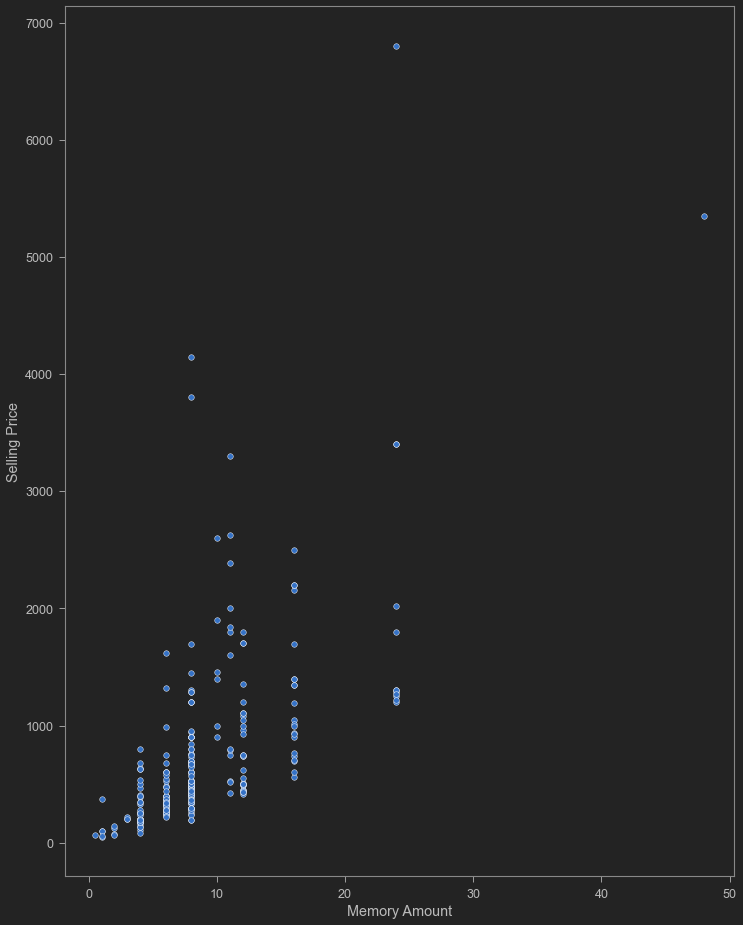

In [15]:
g = sns.scatterplot(df['memory'],df['price'])
g.set(xlabel='Memory Amount', ylabel='Selling Price')
plt.show()

In [16]:
##/* This is mostly what I would expect to see, the bulk of the  values are under 30gb of memory and under $3000. 
##/* There are still some values outside of this range that are likely to be valid data but the price points indicate 
##/* that these are out of the norm or were due to price gouging instances because of high demand of GPU's for crypto mining. 
##/* For the purposes of this analysis I'll set the limit at $3000. 

In [17]:
df = df[df['price'] < 3000]

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



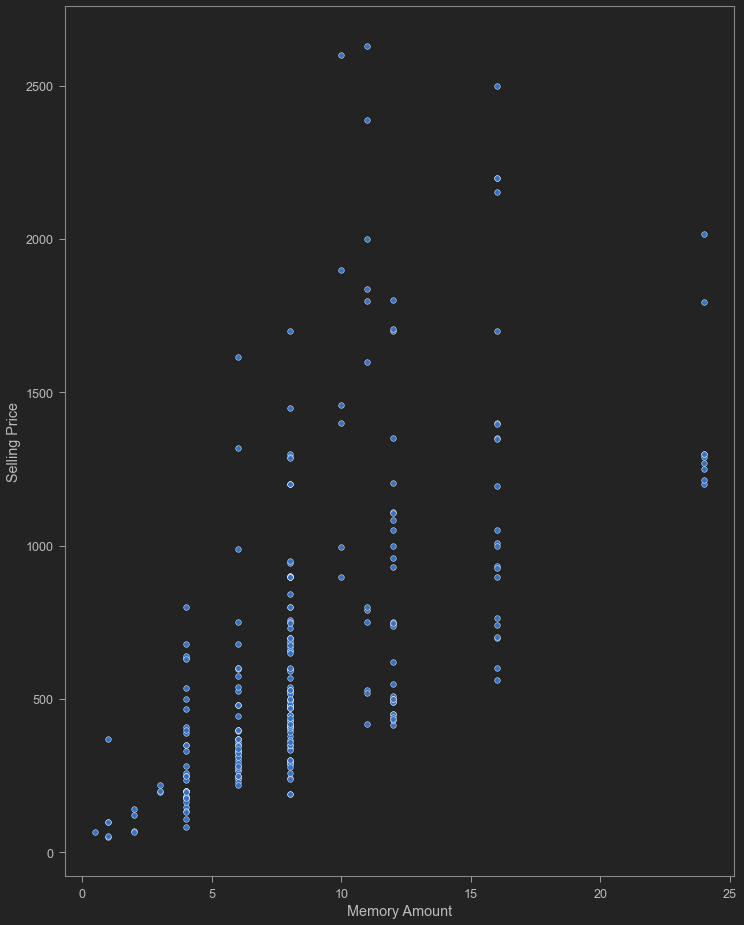

In [18]:
g = sns.scatterplot(df['memory'],df['price'])
g.set(xlabel='Memory Amount', ylabel='Selling Price')
plt.show()

In [19]:
##/* That looks a little better, though I would say paying more than $2000 is absurd (and if you asked a prior generation, they would say I was crazy to pay even $1000). 

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



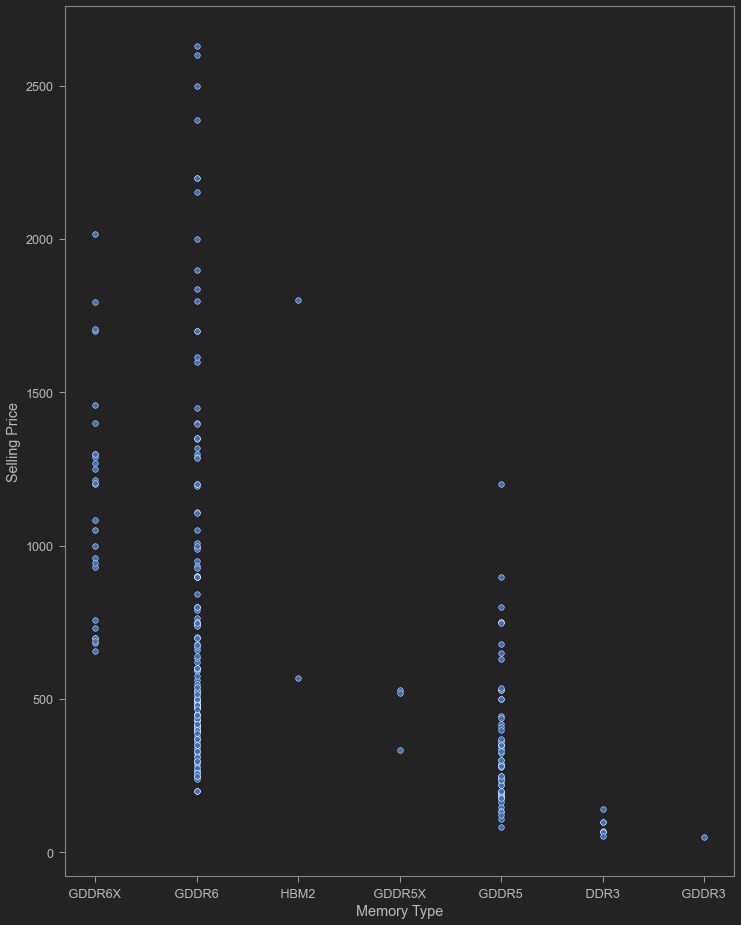

In [20]:
g = sns.scatterplot(df['memory_interface'],df['price'])
g.set(xlabel='Memory Type', ylabel='Selling Price')
plt.show()

In [21]:
##/* Interesting, Cards using GDDR6X (the current top end) memory don't account for the highest prices,
##/* perhaps this has more to do with availability, or just a larger availability of the older option GDDR6. 

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



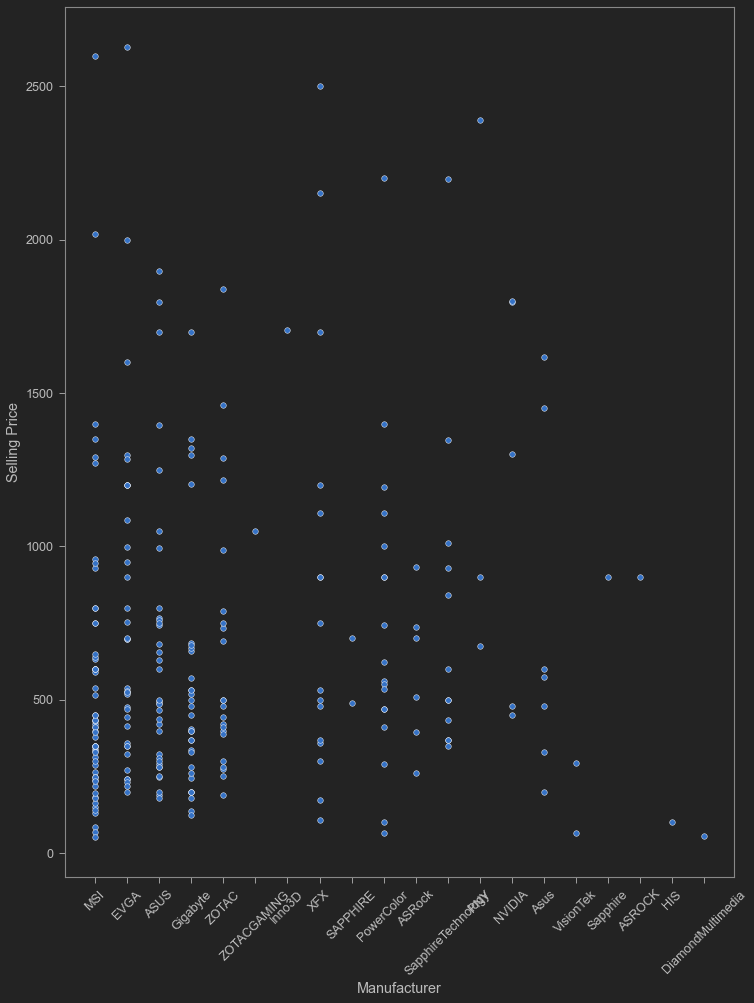

In [22]:
g = sns.scatterplot(df['brand'],df['price'])
g.set(xlabel='Manufacturer', ylabel='Selling Price')
plt.xticks(rotation=45)
plt.show()

In [23]:
##/* Again this is what I'd expect to see. The majority of manufacturers have prices that run through the whole range and 
##/* the data allows for the creation of the big dipper at the top of the graph hmm, probably no correlation there. 

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



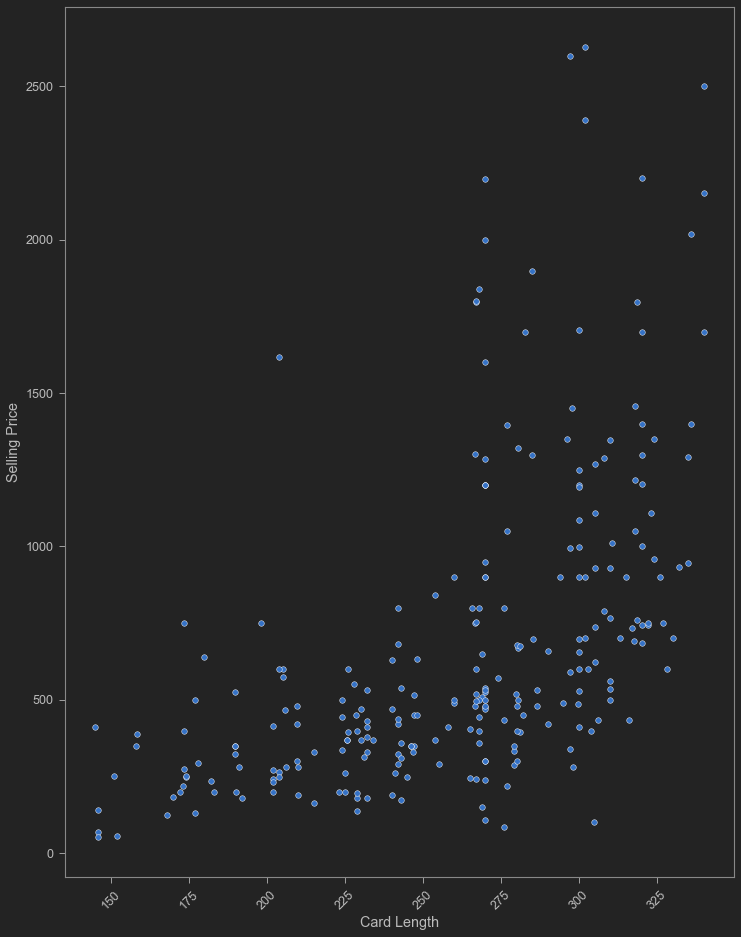

In [24]:
g = sns.scatterplot(df['length'],df['price'])
g.set(xlabel='Card Length', ylabel='Selling Price')
plt.xticks(rotation=45)
plt.show()

In [25]:
##//* Color me shocked, if you would have asked me before I charted this, I would have said there 
##//* would be no impact on price vs the length of the card. There likely isn't any correlation here,
##//* it is more likely that the cards got longer with the newer offerings having a higher cooling need, 
##//* this in turn required a higher level of cooling fans added, thus the extended length and because they are
##//* the newest offerings the price is high. 

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



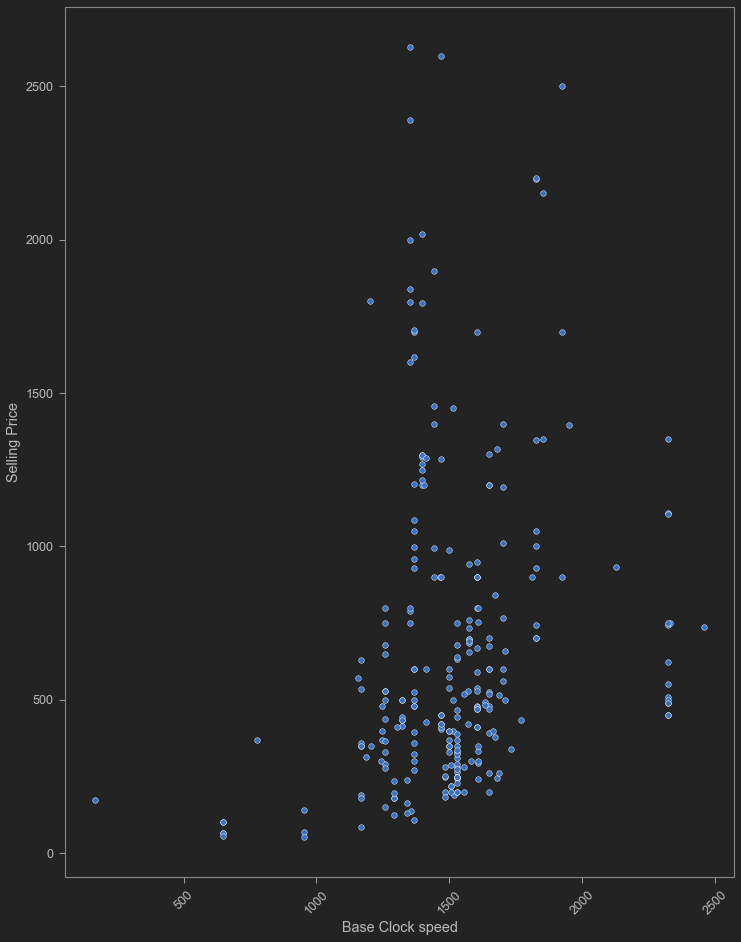

In [26]:
g = sns.scatterplot(df['base_clock'],df['price'])
g.set(xlabel='Base Clock speed', ylabel='Selling Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\cwnos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



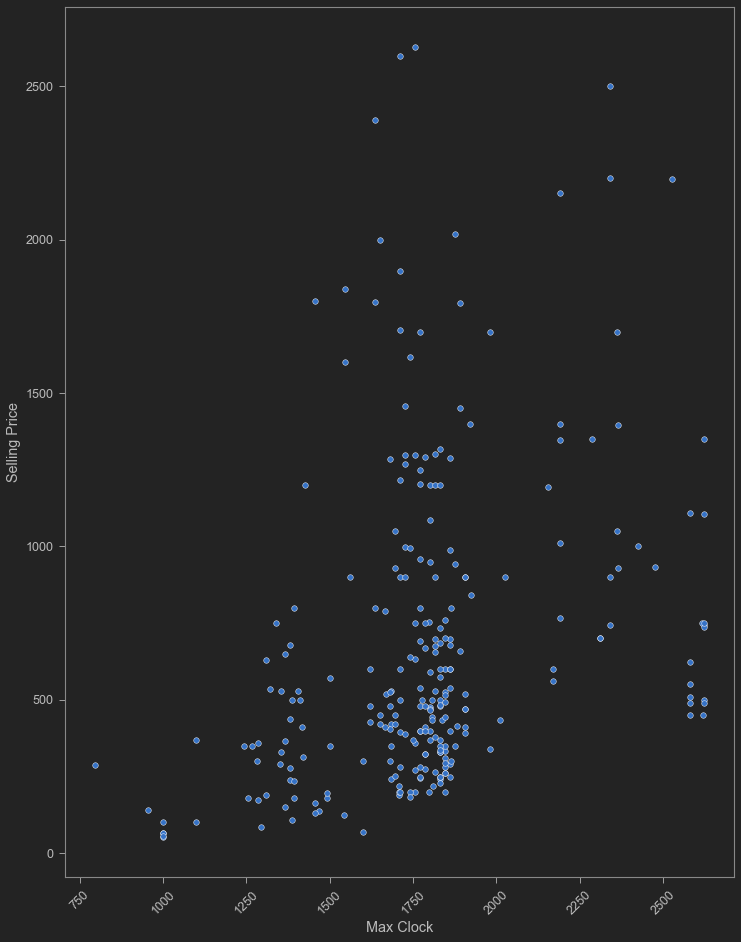

In [27]:
g = sns.scatterplot(df['clock_speed'],df['price'])
g.set(xlabel='Max Clock', ylabel='Selling Price')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.head()

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,price
0,MSI Gaming GeForce RTX 3090 24GB GDDR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24.0,GDDR6X,335.0,PCIe x16,GeForce RTX 3090,1395,1785,1289.99
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24.0,GDDR6X,300.0,PCIe x16,GeForce RTX 3090,1395,1800,1199.99
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24.0,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,1794.99
3,MSI Gaming GeForce RTX 3090 24GB GDDR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24.0,GDDR6X,336.0,PCIe x16,GeForce RTX 3090,1395,1875,2017.21
5,ASUS TUF Gaming NVIDIA GeForce RTX 3090 OC Edi...,ASUS,TUF Gaming RTX 3090 OC Edition,24.0,GDDR6X,299.9,PCIe x16,GeForce RTX 3090,1395,1770,1249.00


In [29]:
df.price.median()

499.0

In [30]:
df.describe()

,memory,length,base_clock,clock_speed,price
count,262.000000,258.000000,262.000000,262.000000,262.000000
mean,8.650763,260.389484,1513.484733,1785.114504,674.542023
std,4.587713,47.332689,306.522614,338.216500,508.877400
min,0.500000,145.000000,168.000000,797.000000,51.210000
25%,6.000000,229.000000,1365.000000,1672.500000,330.742500
50%,8.000000,269.415000,1506.000000,1785.000000,499.000000
75%,11.000000,300.000000,1607.000000,1860.000000,899.000000
max,24.000000,340.000000,2457.000000,2622.000000,2629.000000


In [31]:
df.isna()

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
304,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,True,False,False,False,False,False
306,False,False,False,False,False,True,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df.isna().sum()

name                0
brand               0
model               0
memory              0
memory_interface    0
length              4
interface           0
chipset             0
base_clock          0
clock_speed         0
price               0
dtype: int64

In [33]:
df.fillna(value=260.389484, method=None, axis=None, inplace=True, limit=None, downcast=None)

In [34]:
df.isna().sum()

name                0
brand               0
model               0
memory              0
memory_interface    0
length              0
interface           0
chipset             0
base_clock          0
clock_speed         0
price               0
dtype: int64

In [35]:
##//* Ok that there is a skew in each of these should be of no surprise with the number of cards becoming available with each new iteration. 
##//* The question becomes, how do we want to handle this? I'm not sure classification will help in this instance because of the range of options
##//* available to us, I'm not certain the classification will make notable sense. 
##//* With Linear or Logistic regression we would need to normalize the data. 
##//* Perhaps with this data, it might be best to go with a random forest, it can handle the categorical data as well as the numeric,
##//* it's not as susceptable to skew or outliers, I think this might just be the way to go. 

In [36]:
df = df.drop(columns = ['name'])
df.head()

,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,price
0,MSI,RTX 3090 GAMING X TRIO 24G,24.0,GDDR6X,335.0,PCIe x16,GeForce RTX 3090,1395,1785,1289.99
1,EVGA,RTX 3090 FTW3 Ultra,24.0,GDDR6X,300.0,PCIe x16,GeForce RTX 3090,1395,1800,1199.99
2,ASUS,ROG Strix RTX 3090 OC Edition,24.0,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,1794.99
3,MSI,RTX 3090 SUPRIM X 24G,24.0,GDDR6X,336.0,PCIe x16,GeForce RTX 3090,1395,1875,2017.21
5,ASUS,TUF Gaming RTX 3090 OC Edition,24.0,GDDR6X,299.9,PCIe x16,GeForce RTX 3090,1395,1770,1249.00


In [37]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(df)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,brand_ASROCK,brand_ASRock,brand_ASUS,brand_Asus,brand_DiamondMultimedia,brand_EVGA,brand_Gigabyte,brand_HIS,brand_Inno3D,brand_MSI,...,chipset_ Radeon RX 5700 XT,chipset_ Radeon RX 580,chipset_ Radeon RX 590,chipset_ Radeon RX 6700 XT,chipset_ Radeon RX 6800,chipset_ Radeon RX 6800 XT,chipset_ Radeon RX 6900 XT,chipset_ Radeon RX VEGA 56,chipset_ RadeonÂ RXÂ 580,chipset_ Titan V
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:

# Labels are the values we want to predict
labels = np.array(features['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [39]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [40]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (196, 291)
Training Labels Shape: (196,)
Testing Features Shape: (66, 291)
Testing Labels Shape: (66,)


In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [42]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

In [43]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 58.11 %.


In [ ]:
##/* Well that's not exactly what I was hoping to see, Let's give something else a shot and see if it's truly as bad as I think. 

In [58]:
from sklearn.linear_model import LinearRegression



X = df[['memory']]
y = df['price']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [59]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 84.42816562453925
betas = [68.21523521]


In [60]:
model.predict(X)

array([1721.5938107 , 1721.5938107 , 1721.5938107 , 1721.5938107 ,
       1721.5938107 , 1721.5938107 , 1721.5938107 , 1721.5938107 ,
       1721.5938107 ,  903.01098816,  903.01098816,  903.01098816,
        903.01098816,  903.01098816,  903.01098816,  903.01098816,
        903.01098816, 1175.87192901, 1175.87192901, 1175.87192901,
       1175.87192901, 1175.87192901, 1175.87192901, 1175.87192901,
        766.58051774,  766.58051774,  766.58051774,  766.58051774,
        766.58051774,  766.58051774, 1175.87192901, 1175.87192901,
       1175.87192901, 1175.87192901, 1175.87192901, 1175.87192901,
       1175.87192901,  834.79575295,  834.79575295,  834.79575295,
        834.79575295,  834.79575295,  834.79575295,  834.79575295,
        834.79575295,  834.79575295,  630.15004731,  630.15004731,
        630.15004731,  630.15004731,  630.15004731,  630.15004731,
        630.15004731,  630.15004731,  903.01098816,  903.01098816,
        903.01098816,  903.01098816,  903.01098816,  903.01098

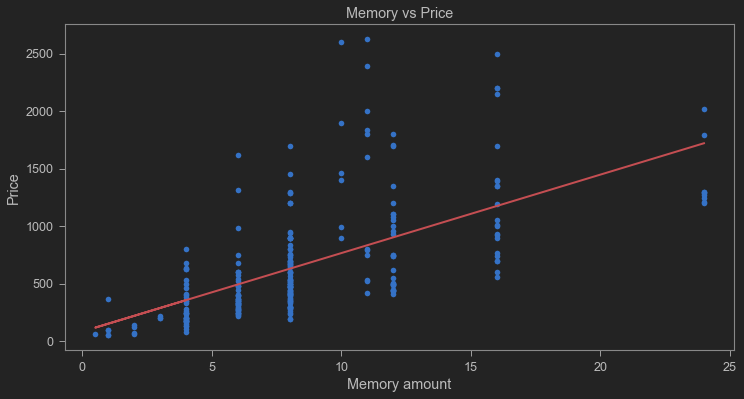

In [62]:

# Predict values
pred = model.predict(X)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, df['price'], 'o')           # scatter plot showing actual data
plt.plot(X, pred, 'r', linewidth=2)   # regression line
plt.xlabel('Memory amount')
plt.ylabel('Price')
plt.title('Memory vs Price')

plt.show()

In [ ]:
##//* Not a very linear model either, regardless of which single or multiple feature set I chose